In [2]:
import numpy as np
import matplotlib                          
import matplotlib.pyplot as plt       
import pykat.optics.maps as pkm
from pykat import finesse                 
from pykat.commands import *               
from pykat.optics.maps import *            
from IPython.display import display, HTML
import os
from scipy.special import factorial
import time
import fileinput

%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [5]:
def insert(originalfile,string):
    with open(originalfile,'r') as f:
        with open('temp.txt','w') as f2: 
            f2.write(string)
            f2.write(f.read())
    os.rename('temp.txt',originalfile)
    
def theta(x,y):
    return np.where(x == 0, np.where(y>=0,np.pi/2,-np.pi/2), np.where(x>0,np.arctan(y/x),np.arctan(y/x)+np.pi))

def radial(x,y,n,m):
    if m<0:
        m=-m
    sum=0
    for k in range(int((n-m)/2+1)):   
        r=(-1)**k*factorial(n-k)/factorial(k)/factorial((n+m)/2-k)/factorial((n-m)/2-k)*((x**2+y**2)/388**2*2)**(n/2-k)
        sum+=r
    return sum

def angular(x,y,n,m):
    a=theta(x,y)
    if m>=0:
        angular=np.cos(m*a)
    else:
        angular=-np.sin(m*a)
    return angular

def zmap(order,n,m):
    #the center of the map would be map[388][388]
    stepRange = np.arange(777)-388
    x,y=np.meshgrid(stepRange,stepRange,sparse=True)
    zfunc=radial(x,y,n,m)*angular(x,y,n,m)
    zmap=order*zfunc/zfunc.max()
    filename='Z{}{}'.format(n,m)+'order'+str(order)+'phasemap.txt'
    np.savetxt(filename, zmap, delimiter=' ',fmt='%1.4f')
    insert(filename,'''% Surface map
% Name: Z{}{}order{}phasemap
% Type: phase reflection
% Size: 777 777
% Optical center (x,y): 388.0 388.0
% Step size (x,y): 0.0004000000189989805 0.0004000000189989805
% Scaling: 1e-09\n\n\n'''.format(n,m,order))
    print("the maximum value is {}".format(np.amax(zmap)))
    print("the minimim value is {}".format(np.amin(zmap)))
    print("size of the map {}".format(0.0004000000189989805*776))
    
    
def mapfile(order,n,m):
    start_time = time.time()
    if not (n-m)%2:
        zmap(order,n,m)
        filename='Z{}{}'.format(n,m)+'order'+str(order)+'phasemap.txt'
        smap=pkm.read_map(filename, mapFormat='finesse')
        smap.crop(0.155)
       # smap.preparePhaseMap(w=None, verbose=False) 
        fig2 = smap.plot()
    else:
        print("Invalid indexes")
    print("--- %s seconds ---" % (time.time() - start_time))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arctan
  if __name__ == '__main__':


the maximum value is 10.0
the minimim value is -10.0
size of the map 0.3104000147432089


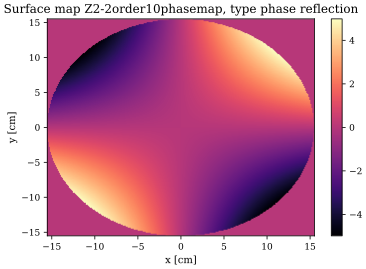

--- 1.1238157749176025 seconds ---


In [6]:
mapfile(10,2,-2)